In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
passes_summary = pd.read_pickle("passes.pkl")

Drehe Pässe von zweiter Halbzeit um, damit home_team immer von links nach rechts spielt.

In [95]:
mask = passes_summary['PERIOD'] == 2
passes_summary.loc[mask, ['start_X', 'end_X']] *= -1
passes_summary.loc[mask, ['start_Y', 'end_Y']] *= -1

In [96]:
passes_summary

,motion_number,start_X,start_Y,end_X,end_Y,PERIOD,POSSESSION_GROUP_start,POSSESSION_GROUP_end,FRAME_START,FRAME_END,POSSESSION_TRACKABLE_OBJECT,Angekommen,Passgeber,Passempfänger,überspielte Verteidiger,Torschuss
0,1,-1.23,2.40,-13.96,11.76,1.0,away team,away team,96,114,28566,True,28566.0,24372.0,0,False
1,2,-13.84,12.75,-3.90,28.36,1.0,away team,away team,116,131,24372,True,24372.0,39023.0,1,False
2,3,0.32,31.75,-8.89,29.12,1.0,home team,home team,174,188,<NA>,True,16427.0,16471.0,0,False
3,4,-6.60,24.64,7.12,25.91,1.0,away team,away team,233,240,<NA>,True,24372.0,28566.0,1,False
4,5,8.95,31.28,17.63,24.20,1.0,away team,home team,259,267,<NA>,False,39023.0,39015.0,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,862,0.53,19.75,-3.27,20.59,2.0,away team,away team,57105,57112,<NA>,True,39023.0,39023.0,0,False
862,863,-6.68,20.79,7.24,28.90,2.0,away team,away team,57136,57153,<NA>,True,39023.0,39023.0,1,False
863,864,26.85,21.97,32.17,1.23,2.0,away team,away team,57325,57349,<NA>,True,14926.0,29957.0,1,False
864,865,32.55,-0.98,20.84,28.49,2.0,away team,away team,57355,57368,<NA>,True,29957.0,39023.0,0,False


Filtere Pässe in den Strafraum des Heimteams, die erfolgreich waren

In [97]:
strafraum_pass_home = passes_summary[((passes_summary['start_X'] >= -36.5) | (passes_summary['start_Y'].abs() > 20))    #Pass von außerhab des Strafraums
                                     & (passes_summary['end_X'] <= -36.5) & (passes_summary['end_Y'].abs() < 20)        #in den Strafraum
                                     & (passes_summary['POSSESSION_GROUP_end'] == 'home team')                          #vom Heimteam
                                     & (passes_summary['POSSESSION_GROUP_start'] == "home team")]


In [98]:
def visualize_passes(passes_summary, motion_numbers, show_player = False, title = 'Pass'):
    pass_sequence = passes_summary[passes_summary['motion_number'].isin(motion_numbers)]
    
    plt.figure(figsize=(10, 7))
    plt.title(title)

    plt.plot([-52.5, 52.5, 52.5, -52.5, -52.5], [-34, -34, 34, 34, -34], color="white")
    plt.gca().set_facecolor("green")
    plt.xlim(-55, 55)
    plt.ylim(-35, 35)

    for _, row in pass_sequence.iterrows():
        color = 'blue' if row['Angekommen'] else 'red'
        dx = row['end_X'] - row['start_X']
        dy = row['end_Y'] - row['start_Y']

        plt.quiver(
            row['start_X'], row['start_Y'],  # Startpunkt
            dx, dy,                          # Richtungsvektor
            angles='xy',
            scale_units='xy',
            scale=1,
            color=color,
            width=0.003,
            headwidth=3,
            headlength=5
        )        

    plt.show()

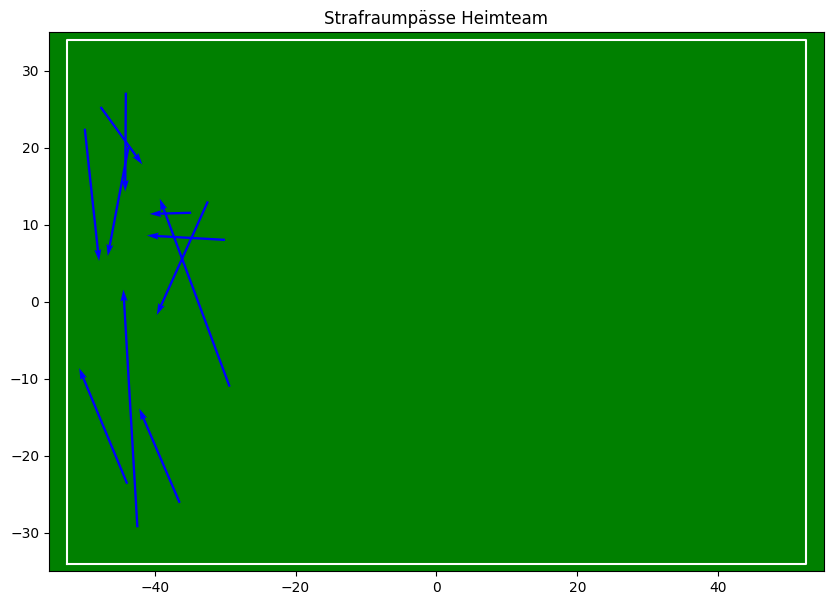

In [99]:
visualize_passes(passes_summary, strafraum_pass_home['motion_number'], title = "Strafraumpässe Heimteam")

In [100]:
strafraum_pass_away = passes_summary[((passes_summary['start_X'] <= 36.5) | (passes_summary['start_Y'].abs() > 20)) 
                                     & (passes_summary['end_X'] >= 36.5) & (passes_summary['end_Y'].abs() < 20) 
                                     & (passes_summary['POSSESSION_GROUP_end'] == 'away team') 
                                     & (passes_summary['POSSESSION_GROUP_start'] == "away team")]

In [101]:
strafraum_pass_home

,motion_number,start_X,start_Y,end_X,end_Y,PERIOD,POSSESSION_GROUP_start,POSSESSION_GROUP_end,FRAME_START,FRAME_END,POSSESSION_TRACKABLE_OBJECT,Angekommen,Passgeber,Passempfänger,überspielte Verteidiger,Torschuss
73,74,-34.82,11.56,-40.71,11.41,1.0,home team,home team,4187,4196,<NA>,True,16427.0,16427.0,0,False
217,218,-36.45,-26.11,-42.18,-13.86,1.0,home team,home team,13640,13651,<NA>,True,29942.0,29942.0,0,False
279,280,-29.36,-11.02,-39.27,13.39,1.0,home team,home team,16803,16821,16471,True,16471.0,16641.0,2,False
412,413,-30.01,8.04,-41.09,8.61,1.0,home team,home team,25893,25906,<NA>,True,16471.0,16471.0,0,False
426,427,-32.45,13.03,-39.70,-1.72,1.0,home team,home team,26877,26888,<NA>,True,16641.0,16427.0,2,False
479,480,-43.90,-23.63,-50.71,-8.61,2.0,home team,home team,30201,30213,<NA>,True,16471.0,16427.0,1,True
481,482,-42.45,-29.29,-44.44,1.59,2.0,home team,home team,30537,30559,<NA>,True,28547.0,16471.0,1,False
534,535,-43.71,20.10,-46.66,5.95,2.0,home team,home team,34264,34273,<NA>,True,16427.0,28437.0,2,False
552,553,-49.92,22.48,-47.89,5.29,2.0,home team,home team,35051,35062,16427,True,16427.0,16471.0,0,False
555,556,-44.09,27.16,-44.18,14.31,2.0,home team,home team,35168,35179,16641,True,16641.0,16427.0,0,False


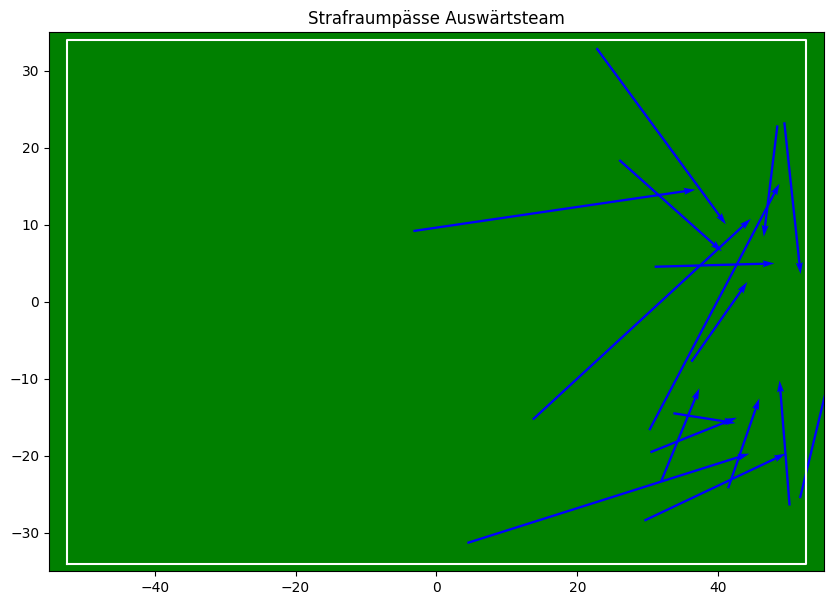

In [102]:
visualize_passes(passes_summary, strafraum_pass_away['motion_number'], title = "Strafraumpässe Auswärtsteam")

In [103]:
def zweier_sequenzen(motion_numbers):
    plt.figure(figsize=(10, 7))
    plt.title('Sequenzen zu Strafraumaktionen')

    plt.plot([-52.5, 52.5, 52.5, -52.5, -52.5], [-34, -34, 34, 34, -34], color="white")
    plt.gca().set_facecolor("green")
    plt.xlim(-55, 55)
    plt.ylim(-35, 35)
    for motion_number in motion_numbers:
        pass_strafraum = passes_summary[passes_summary['motion_number'] == motion_number].iloc[0]
        pre_pass = passes_summary[passes_summary['motion_number'] == motion_number-1].iloc[0]
        #Pass in den Strafraum
        color = 'blue' if pass_strafraum['Angekommen'] else 'red'
        dx = pass_strafraum['end_X'] - pass_strafraum['start_X']
        dy = pass_strafraum['end_Y'] - pass_strafraum['start_Y']

        plt.quiver(
                    pass_strafraum['start_X'], pass_strafraum['start_Y'],  # Startpunkt
                    dx, dy,                          # Richtungsvektor
                    angles='xy',
                    scale_units='xy',
                    scale=1,
                    color=color,
                    width=0.003,
                    headwidth=3,
                    headlength=5
                )
        #Pre-Pass 
        color = 'blue' if pre_pass['Angekommen'] else 'red'
        dx = pre_pass['end_X'] - pre_pass['start_X']
        dy = pre_pass['end_Y'] - pre_pass['start_Y']

        plt.quiver(
                    pre_pass['start_X'], pre_pass['start_Y'],  # Startpunkt
                    dx, dy,                          # Richtungsvektor
                    angles='xy',
                    scale_units='xy',
                    scale=1,
                    color=color,
                    width=0.003,
                    headwidth=3,
                    headlength=5,
                    alpha = 0.5
                )
        #Laufweg
        dx = pass_strafraum['start_X'] - pre_pass['end_X']
        dy = pass_strafraum['start_Y'] - pre_pass['end_Y']
        plt.quiver(
                    pre_pass['end_X'], pre_pass['end_Y'],  # Startpunkt
                    dx, dy,                          # Richtungsvektor
                    angles='xy',
                    scale_units='xy',
                    scale=1,
                    color='cyan',
                    width=0.003,
                    headwidth=3,
                    headlength=5
                )

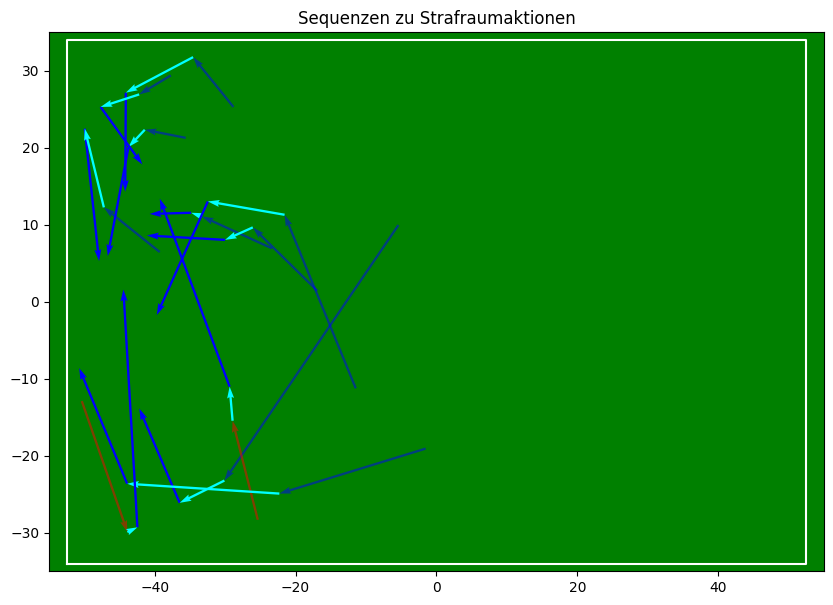

In [104]:
strafraum_pass_numbers_home = strafraum_pass_home['motion_number']
zweier_sequenzen(motion_numbers = strafraum_pass_numbers_home)

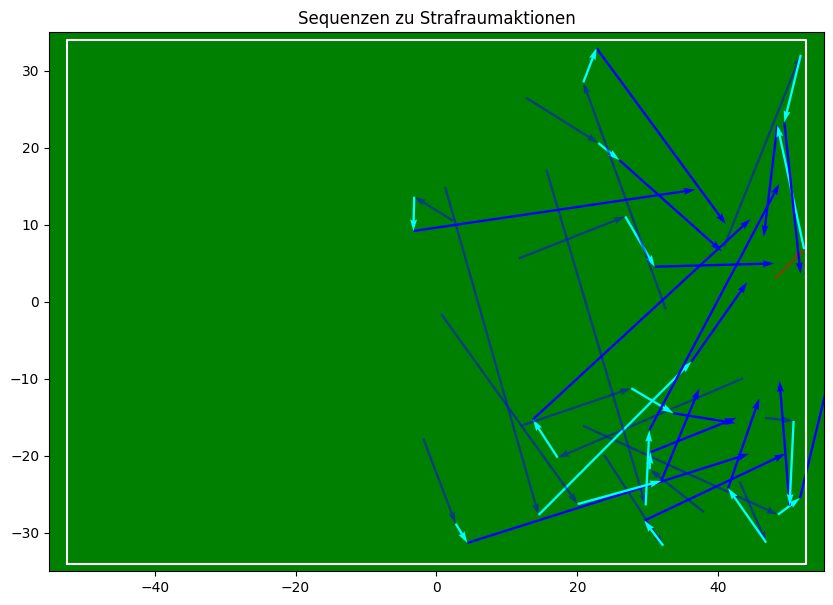

In [105]:
strafraum_pass_numbers_away = strafraum_pass_away['motion_number']
zweier_sequenzen(motion_numbers = strafraum_pass_numbers_away)

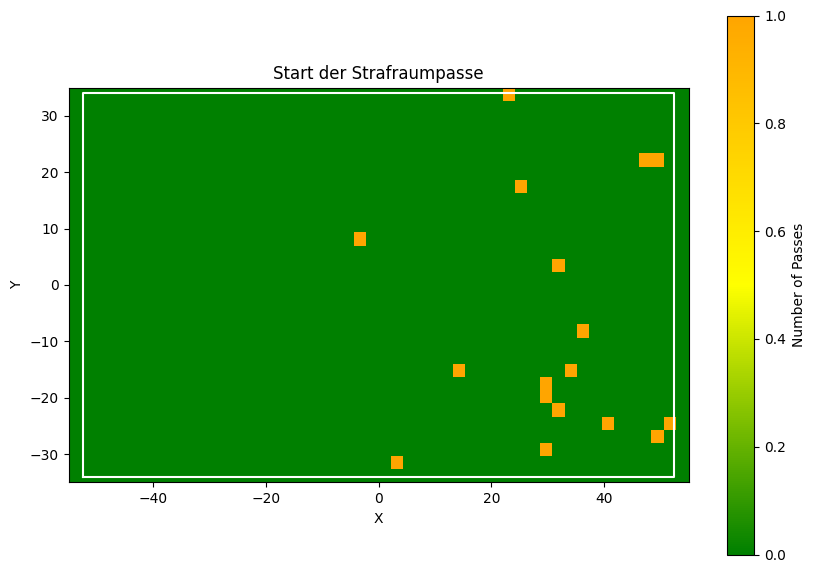

In [106]:
from matplotlib.colors import LinearSegmentedColormap

green_red_cmap = LinearSegmentedColormap.from_list("green_red", ["green", "yellow", "orange"])
plt.figure(figsize=(10, 7))
plt.title("Start der Strafraumpasse")

plt.plot([-52.5, 52.5, 52.5, -52.5, -52.5], [-34, -34, 34, 34, -34], color="white")
plt.xlim(-55, 55)
plt.ylim(-35, 35)
plt.gca().set_facecolor("green")

plt.hist2d(
    passes_summary[passes_summary['motion_number'].isin(strafraum_pass_numbers_away)]['start_X'],
    passes_summary[passes_summary['motion_number'].isin(strafraum_pass_numbers_away)]['start_Y'],
    bins=[50, 30],           # Anzahl der Bins in X und Y (quadratisch = gleiche Zahl)
    range=[[-55, 55], [-35, 35]],  # Spielfeldgrenzen
    cmap=green_red_cmap
)
plt.xlabel("X")
plt.ylabel("Y")
plt.gca().set_aspect('equal')
plt.colorbar(label='Number of Passes')
plt.show()

### Welcher Spieler ist an 2er Pattern, die zu einer Strafraumaktion führt beteiligt?  
Mit mehr Daten: Welche Spielerkombinationen harmonieren besonders gut?

In [107]:
player_summary = pd.read_pickle('player_summary.pkl')

In [108]:
player_summary['Strafraumpässe'] = 0
player_summary['Pre-Strafraumpässe'] = 0

In [109]:
for _, row in strafraum_pass_home.iterrows():
    p = row['Passgeber']
    player_summary.loc[player_summary['Player'] == p, 'Strafraumpässe'] += 1
for _, row in strafraum_pass_away.iterrows():
    p = row['Passgeber']
    player_summary.loc[player_summary['Player'] == p, 'Strafraumpässe'] += 1

In [110]:
pre_pass_numbers_away = strafraum_pass_numbers_away - 1 
pre_pass_numbers_home = strafraum_pass_numbers_home - 1
pre_pass_home = passes_summary[passes_summary['motion_number'].isin(pre_pass_numbers_home)]
pre_pass_away = passes_summary[passes_summary['motion_number'].isin(pre_pass_numbers_away)]

In [111]:
for _, row in pre_pass_home.iterrows():
    p = row['Passgeber']
    player_summary.loc[player_summary['Player'] == p, 'Pre-Strafraumpässe'] += 1
for _, row in pre_pass_away.iterrows():
    p = row['Passgeber']
    player_summary.loc[player_summary['Player'] == p, 'Pre-Strafraumpässe'] += 1

In [115]:
player_summary

,Player,team,Pässe,Angekommene Pässe,Fehlpässe,Passquote,Überspielte Verteidiger,Startaufstellung,Einwechslung,Auswechslung,Strafraumpässe,Pre-Strafraumpässe
0,28437,home team,31,23,8,0.741935,6,True,00:00:00,01:10:26.9,0,0
1,16471,home team,36,27,9,0.750000,15,True,00:00:00,01:24:39.6,3,2
2,28435,away_team,18,15,3,0.833333,3,True,00:00:00,01:34:36.2,1,1
3,28566,away_team,50,39,11,0.780000,27,True,00:00:00,01:34:36.2,1,3
4,29957,away_team,42,36,6,0.857143,8,True,00:00:00,01:34:36.2,3,3
5,29926,away_team,45,41,4,0.911111,19,True,00:00:00,01:08:32.9,1,1
6,61575,away_team,34,33,1,0.970588,18,True,00:00:00,00:54:30.1,0,0
7,28555,away_team,58,51,7,0.879310,33,True,00:00:00,01:08:32.9,3,1
8,39023,away_team,58,51,7,0.879310,33,True,00:00:00,01:34:36.2,1,1
9,28565,away_team,37,33,4,0.891892,19,True,00:00:00,01:34:36.2,5,1
